## load package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [3]:
import lazypredict

## import data

In [4]:
!pwd

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml/binary_classification


In [5]:
master_micro = pd.read_csv("../../0_data/master.csv")

In [6]:
master_micro

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,...,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,...,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,...,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,...,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,...,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,600,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,...,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,601,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,...,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,602,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,...,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,603,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,...,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [150]:
master_micro.groupby('type_micro').describe()

Unnamed: 0                                                    \
                count     mean      std  min      25%      50%      75%   
type_micro                                                                
lithic        5299.00  2649.00  1529.83 0.00  1324.50  2649.00  3973.50   
soil        478354.00 61424.17 42761.33 0.00 26113.00 56010.00 90105.00   

                            Id                                           \
                 max     count     mean      std  min      25%      50%   
type_micro                                                                
lithic       5298.00   5299.00  2650.00  1529.83 1.00  1325.50  2650.00   
soil       170884.00 478354.00 61425.17 42761.33 1.00 26114.00 56011.00   

                                 Img Id                                    \
                75%       max     count     mean     std     min      25%   
type_micro                                                                  
lithic      3974.50   5299.00   5299.00 16457.53 1450.28 2812.00 16376.00   
soil       90106.00 170885.00 478354.00  7245.73 4551.06 1764.00  4787.00   

                                             Da                                \
                50%      75%      max     count mean  std  min  25%  50%  75%   
type_micro                                                                      
lithic     16613.00 16845.00 19030.00   5299.00 0.41 1.63 0.04 0.16 0.19 0.25   
soil        6220.00  8033.00 41131.00 478354.00 0.31 0.31 0.02 0.21 0.25 0.33   

                        Dp                                        FWidth       \
             max     count mean  std  min  25%  50%  75%   max     count mean   
type_micro                                                                      
lithic     30.89   5299.00 0.53 2.19 0.06 0.20 0.25 0.33 38.25   5299.00 0.35   
soil       13.30 478354.00 0.35 0.36 0.06 0.23 0.28 0.36 16.89 478354.00 0.31   

                                            FLength                           \
            std  min  25%  50%  75%   max     count mean  std  min  25%  50%   
type_micro                                                                     
lithic     1.69 0.02 0.11 0.14 0.19 36.88   5299.00 0.73 3.02 0.07 0.25 0.34   
soil       0.31 0.02 0.20 0.26 0.34 12.97 478354.00 0.48 0.47 0.07 0.30 0.40   

                      FThickness                                      \
            75%   max      count mean  std  min  25%  50%  75%   max   
type_micro                                                             
lithic     0.46 57.35    5299.00 0.22 0.66 0.02 0.10 0.13 0.17 16.45   
soil       0.54 17.86  478354.00 0.21 0.22 0.02 0.14 0.17 0.22 11.32   

             ELength                                     EThickness            \
               count mean  std  min  25%  50%  75%   max      count mean  std   
type_micro                                                                      
lithic       5299.00 0.70 2.95 0.04 0.24 0.32 0.43 50.54    5299.00 0.21 0.62   
soil       478354.00 0.49 0.47 0.04 0.30 0.40 0.55 16.40  478354.00 0.21 0.21   

                                        EWidth                                \
            min  25%  50%  75%   max     count mean  std  min  25%  50%  75%   
type_micro                                                                     
lithic     0.01 0.10 0.12 0.16 16.23   5299.00 0.34 1.63 0.01 0.10 0.13 0.19   
soil       0.01 0.14 0.17 0.22 11.31 478354.00 0.30 0.31 0.01 0.20 0.25 0.33   

                    Volume                                               Area  \
             max     count  mean    std  min  25%  50%  75%     max     count   
type_micro                                                                      
lithic     34.44   5299.00 16.60 236.16 0.00 0.00 0.00 0.01 9202.97   5299.00   
soil       13.02 478354.00  0.20   4.99 0.00 0.01 0.01 0.02 1282.70 478354.00   

                                                 Perimeter                 \
         

In [151]:
master_micro.groupby('size_micro').describe()

Unnamed: 0                                                     \
                count     mean      std  min      25%      50%       75%   
size_micro                                                                 
0.125mm     170885.00 85442.00 49330.39 0.00 42721.00 85442.00 128163.00   
0.25mm      115876.00 57937.50 33450.66 0.00 28968.75 57937.50  86906.25   
0.5mm       103144.00 51571.50 29775.25 0.00 25785.75 51571.50  77357.25   
1mm          10191.00  5095.00  2942.03 0.00  2547.50  5095.00   7642.50   
2mm           4340.00  2169.50  1252.99 0.00  1084.75  2169.50   3254.25   
4mm            605.00   302.00   174.79 0.00   151.00   302.00    453.00   
unknown      78612.00 34363.69 22148.86 0.00 14353.75 34006.50  53659.25   

                            Id                                           \
                 max     count     mean      std  min      25%      50%   
size_micro                                                                
0.125mm    170884.00 170885.00 85443.00 49330.39 1.00 42722.00 85443.00   
0.25mm     115875.00 115876.00 57938.50 33450.66 1.00 28969.75 57938.50   
0.5mm      103143.00 103144.00 51572.50 29775.25 1.00 25786.75 51572.50   
1mm         10190.00  10191.00  5096.00  2942.03 1.00  2548.50  5096.00   
2mm          4339.00   4340.00  2170.50  1252.99 1.00  1085.75  2170.50   
4mm           604.00    605.00   303.00   174.79 1.00   152.00   303.00   
unknown     73312.00  78612.00 34364.69 22148.86 1.00 14354.75 34007.50   

                                  Img Id                                    \
                 75%       max     count     mean      std     min     25%   
size_micro                                                                   
0.125mm    128164.00 170885.00 170885.00  4291.65  1309.22 1951.00 3151.00   
0.25mm      86907.25 115876.00 115876.00  6301.56  1172.32 3770.00 5372.00   
0.5mm       77358.25 103144.00 103144.00  7597.98  1339.96 4662.00 6523.00   
1mm          7643.50  10191.00  10191.00  8909.47  2701.29 3560.00 6856.00   
2mm          3255.25   4340.00   4340.00 18168.33 10985.28 1764.00 9114.00   
4mm           454.00    605.00    605.00  9031.20  2305.68 3179.00 7197.00   
unknown     53660.25  73313.00  78612.00 14385.32  6144.12 2812.00 9804.00   

                                             Da                                \
                50%      75%      max     count mean  std  min  25%  50%  75%   
size_micro                                                                      
0.125mm     4172.00  5463.00  6497.00 170885.00 0.23 0.04 0.08 0.20 0.23 0.25   
0.25mm      6416.00  7307.00  8145.00 115876.00 0.32 0.08 0.08 0.26 0.30 0.36   
0.5mm       7716.00  8752.00  9722.00 103144.00 0.35 0.13 0.07 0.26 0.33 0.41   
1mm         8959.00 11064.00 13919.00  10191.00 0.86 0.59 0.10 0.29 0.62 1.36   
2mm        13654.00 29036.75 41131.00   4340.00 2.07 1.07 0.12 0.93 2.41 2.74   
4mm         9101.00 10741.00 14291.00    605.00 2.73 2.22 0.14 0.48 2.29 4.82   
unknown    13410.50 17243.00 28051.00  78612.00 0.24 0.56 0.02 0.15 0.18 0.24   

                        Dp                                        FWidth       \
             max     count mean  std  min  25%  50%  75%   max     count mean   
size_micro                                                                      
0.125mm     0.69 170885.00 0.25 0.06 0.13 0.22 0.25 0.28  1.02 170885.00 0.24   
0.25mm      0.92 115876.00 0.35 0.09 0.13 0.28 0.33 0.40  1.16 115876.00 0.32   
0.5mm       1.47 103144.00 0.39 0.15 0.13 0.29 0.35 0.46  1.76 103144.00 0.36   
1mm         3.78  10191.00 0.93 0.64 0.13 0.32 0.70 1.46  4.33  10191.00 0.84   
2mm         5.78   4340.00 2.32 1.24 0.14 1.08 2.64 3.06  9.31   4340.00 2.01   
4mm         7.57    605.00 3.06 2.47 0.14 0.54 2.91 5.29  9.00    605.00 2.66   
unknown    30.89  78612.00 0.30 0.73 0.06 0.17 0.20 0.29 38.25  78612.00 0.20   

                                            FLength                           \
            std 

In [7]:
micro = master_micro[(master_micro['size_micro']=="unknown") | (master_micro['type_micro']=="lithic")].iloc[: , 3:]

In [8]:
pd.set_option('display.max_columns', None)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78607,0.037,0.089,0.019,0.135,0.019,0.044,0.016,0.016,0.000,0.001,0.279,0.001,0.274,0.416,6.914,0.145,0.274,0.075,0.370,0.173,0.720,0.280,0.984,0.409,0,0.660,0.0,0.004,Reject,Reject,Reject,Reject,Reject,Reject,Reject,6.914,0.145,1.000,1.000,0.006,0.019,0.000,2.705,0.000,0.000,1.000,unknown,soil
78608,0.035,0.064,0.036,0.080,0.036,0.077,0.015,0.015,0.000,0.001,0.202,0.002,0.194,0.545,2.237,0.447,0.440,0.193,0.190,0.297,0.577,0.423,0.960,0.340,0,0.545,0.0,0.004,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.237,0.447,1.000,1.000,0.007,0.036,85.000,5.253,0.000,0.000,1.000,unknown,soil
78609,0.035,0.073,0.039,0.087,0.039,0.092,0.018,0.018,0.000,0.001,0.228,0.002,0.211,0.478,2.232,0.448,0.401,0.161,0.200,0.229,0.440,0.560,0.928,0.282,0,0.514,0.0,0.004,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.232,0.448,1.000,1.000,0.009,0.039,0.000,4.990,0.000,0.000,1.000,unknown,soil
78610,0.029,0.075,0.040,0.084,0.040,0.095,0.024,0.024,0.000,0.001,0.235,0.002,0.210,0.390,2.078,0.481,0.348,0.121,0.256,0.152,0.317,0.683,0.894,0.197,0,0.519,0.0,0.003,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.078,0.481,1.000,1.000,0.008,0.040,113.333,3.906,0.000,0.000,1.000,unknown,soil


## data processing

### Other processing

In [9]:
# Drop the columns (filter1, filter2, ...)
to_drop = micro.filter(regex='^Filter').columns
micro = micro.drop(columns=to_drop)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78607,0.037,0.089,0.019,0.135,0.019,0.044,0.016,0.016,0.000,0.001,0.279,0.001,0.274,0.416,6.914,0.145,0.274,0.075,0.370,0.173,0.720,0.280,0.984,0.409,0,0.660,0.0,0.004,6.914,0.145,1.000,1.000,0.006,0.019,0.000,2.705,0.000,0.000,1.000,unknown,soil
78608,0.035,0.064,0.036,0.080,0.036,0.077,0.015,0.015,0.000,0.001,0.202,0.002,0.194,0.545,2.237,0.447,0.440,0.193,0.190,0.297,0.577,0.423,0.960,0.340,0,0.545,0.0,0.004,2.237,0.447,1.000,1.000,0.007,0.036,85.000,5.253,0.000,0.000,1.000,unknown,soil
78609,0.035,0.073,0.039,0.087,0.039,0.092,0.018,0.018,0.000,0.001,0.228,0.002,0.211,0.478,2.232,0.448,0.401,0.161,0.200,0.229,0.440,0.560,0.928,0.282,0,0.514,0.0,0.004,2.232,0.448,1.000,1.000,0.009,0.039,0.000,4.990,0.000,0.000,1.000,unknown,soil
78610,0.029,0.075,0.040,0.084,0.040,0.095,0.024,0.024,0.000,0.001,0.235,0.002,0.210,0.390,2.078,0.481,0.348,0.121,0.256,0.152,0.317,0.683,0.894,0.197,0,0.519,0.0,0.003,2.078,0.481,1.000,1.000,0.008,0.040,113.333,3.906,0.000,0.000,1.000,unknown,soil


In [10]:
micro = micro.drop(columns=['hash', 'size_micro', 'Krumbein Rnd']) #'Krumbein Rnd'
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78607,0.037,0.089,0.019,0.135,0.019,0.044,0.016,0.016,0.000,0.001,0.279,0.001,0.274,0.416,6.914,0.145,0.274,0.075,0.370,0.173,0.720,0.280,0.984,0.409,0.660,0.0,0.004,6.914,0.145,1.000,1.000,0.006,0.019,0.000,2.705,0.000,0.000,soil
78608,0.035,0.064,0.036,0.080,0.036,0.077,0.015,0.015,0.000,0.001,0.202,0.002,0.194,0.545,2.237,0.447,0.440,0.193,0.190,0.297,0.577,0.423,0.960,0.340,0.545,0.0,0.004,2.237,0.447,1.000,1.000,0.007,0.036,85.000,5.253,0.000,0.000,soil
78609,0.035,0.073,0.039,0.087,0.039,0.092,0.018,0.018,0.000,0.001,0.228,0.002,0.211,0.478,2.232,0.448,0.401,0.161,0.200,0.229,0.440,0.560,0.928,0.282,0.514,0.0,0.004,2.232,0.448,1.000,1.000,0.009,0.039,0.000,4.990,0.000,0.000,soil
78610,0.029,0.075,0.040,0.084,0.040,0.095,0.024,0.024,0.000,0.001,0.235,0.002,0.210,0.390,2.078,0.481,0.348,0.121,0.256,0.152,0.317,0.683,0.894,0.197,0.519,0.0,0.003,2.078,0.481,1.000,1.000,0.008,0.040,113.333,3.906,0.000,0.000,soil


### Redersampling

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [11]:
# !pip install imblearn

In [12]:
# from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

In [13]:
micro.groupby('type_micro').describe()

Da                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        73313.0  0.231986  0.376004  0.024  0.152  0.174  0.236  13.303   

                 Dp                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        73313.0  0.284808  0.467939  0.058  0.166  0.197  0.283  16.888   

             FWidth                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        73313.0  0.183764  0.372174  0.019  0.112  0.137  0.179  12.966   

            FLength                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        73313.0  0.361650  0.575190  0.074  0.187  0.243  0.367  17.865   

           FThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.130  0.170  16.445   
soil          73313.0  0.170072  0.292985  0.019  0.112  0.135  0.173  11.317   

            ELength                                                           \
              count      mean       std    min    25%    50%     75%     max   
type_micro                                                                     
lithic       5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        73313.0  0.360535  0.581504  0.041  0.175  0.232  0.3650  16.400   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil          73313.0  0.164455  0.283009  0.014  0.106  0.129  0.167  11.309   

             EWidth                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        73313.0  0.177981  0.360868  0.014  0.107  0.131  0.173  13.021   

             Volume                                                   \
              count       mean         std  min    25%    50%    75%   
type_micro                                                             
lithic       5299.0  16.602042  236.156080  0.0  0.002  0.003  0.007   
soil        73313.0   0.429839   11.821718  0.0  0.001  0.002  0.006   

                         Area                                            \
                 max    count      mean        std    min    25%    50%   
type_micro                                                                
lithic      9202.973   5299.0  2.214862  25.126003  0.001  0.020  0.029   
soil        1282.697  73313.0  0.153318   1.757901  0.000  0.018  0.024   

                           Perimeter                                           \
      

In [14]:
# define the undersampling method
# undersample = SMOTE(sampling_strategy='minority')
# undersample = TomekLinks(sampling_strategy='majority')
undersample = RandomUnderSampler(random_state=42, replacement=True)
# undersample = CondensedNearestNeighbour(n_neighbors=1)

# Separate majority and minority classes
class_column = ['type_micro']
X = micro.drop(columns=class_column)
y = micro[class_column]

X_resampled, y_resampled = undersample.fit_resample(X, y)

In [15]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [16]:
data_resampled.columns = X.columns.tolist() + ['type_micro']


In [17]:
data_resampled

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,0.163,0.170,0.159,0.174,0.159,0.163,0.163,0.163,0.002,0.021,0.533,0.021,0.532,0.962,1.094,0.914,0.940,0.883,1.000,0.925,0.981,0.019,0.998,0.759,0.000,0.0,0.084,1.094,0.914,1.000,1.000,0.085,0.159,0.000,1.000,0.000,0.000,soil
10594,0.299,0.316,0.257,0.349,0.257,0.345,0.261,0.261,0.012,0.070,0.994,0.072,0.987,0.946,1.361,0.735,0.856,0.733,0.756,0.895,0.981,0.019,0.993,0.784,0.254,0.0,0.281,1.361,0.735,1.000,1.000,0.287,0.257,60.000,1.324,0.000,0.000,soil
10595,0.300,0.478,0.160,0.685,0.160,0.751,0.142,0.142,0.009,0.071,1.503,0.088,1.486,0.627,4.273,0.234,0.438,0.192,0.189,0.393,0.805,0.195,0.989,0.644,0.537,0.0,0.283,4.273,0.234,1.000,1.000,0.351,0.160,55.714,5.285,0.631,0.112,soil
10596,0.180,0.188,0.152,0.225,0.152,0.213,0.148,0.148,0.003,0.026,0.591,0.026,0.591,0.959,1.486,0.673,0.800,0.641,0.696,0.920,1.000,0.000,1.000,0.748,0.515,0.0,0.102,1.486,0.673,1.000,1.000,0.102,0.152,68.000,1.437,0.000,0.000,soil


In [18]:
data_resampled.groupby('type_micro').describe()

Da                                                         \
             count      mean       std   min    25%    50%    75%     max   
type_micro                                                                  
lithic      5299.0  0.408032  1.629126  0.04  0.161  0.193  0.251  30.893   
soil        5299.0  0.236270  0.353787  0.04  0.152  0.177  0.238   5.519   

                Dp                                                         \
             count      mean       std    min    25%   50%    75%     max   
type_micro                                                                  
lithic      5299.0  0.533303  2.193727  0.058  0.198  0.25  0.330  38.251   
soil        5299.0  0.290335  0.446631  0.058  0.167  0.20  0.287   8.347   

            FWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        5299.0  0.187055  0.347608  0.021  0.112  0.140  0.183   5.498   

           FLength                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        5299.0  0.368267  0.554412  0.074  0.190  0.248  0.373  11.912   

           FThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.130  0.170  16.445   
soil           5299.0  0.173376  0.272318  0.021  0.112  0.137  0.175   4.324   

           ELength                                                           \
             count      mean       std    min    25%    50%     75%     max   
type_micro                                                                    
lithic      5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        5299.0  0.368152  0.571056  0.041  0.178  0.237  0.3720  12.888   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil           5299.0  0.167176  0.260722  0.021  0.109  0.132  0.169   4.124   

            EWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        5299.0  0.180685  0.336578  0.021  0.109  0.134  0.176   5.695   

            Volume                                                             \
             count       mean         std  min    25%    50%    75%       max   
type_micro                                                                      
lithic      5299.0  16.602042  236.156080  0.0  0.002  0.003  0.007  9202.973   
soil        5299.0   0.276170    3.326194  0.0  0.001  0.002  0.006    89.819   

              Area                                                            \
             count      mean        std    min    25%    50%    75%      max   
type_micro                                                                     
lithic      5299.0  2.214862  25.126003  0.001  0.020  0.029  0.049  749.562   
soil        5299.0  0.142138   1.081805  0.001  0.018  0.025  0.045   23.925   

           Perimeter                                    

In [19]:
# # Separate majority and minority classes
# df_majority = micro1[micro1.type_micro=='soil']
# df_minority = micro1[micro1.type_micro=='lithic']

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=5299,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

### Selected features

In [20]:
# micro1_selected = micro1[["Transparency","FLength","FWidth","FThickness","W/L Ratio", "L/W Ratio", 'Sphericity', 'Circularity', 'Convexity',"type_micro"]]


### Hold-out data

In [159]:
from sklearn.model_selection import train_test_split
import numpy as np

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)



## Models

### Lazy predict

In [22]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
# class_column = ['type_micro']
# random_seed = 42

# features = data_resampled.drop(columns=class_column)
# target = data_resampled[class_column]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
#                                                     random_state=random_seed, 
#                                                     stratify=data_resampled[class_column])

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:29<00:00,  1.02s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.89,0.89,None,0.89,0.55
RandomForestClassifier,0.88,0.88,None,0.88,2.22
BaggingClassifier,0.88,0.88,None,0.88,1.17
ExtraTreesClassifier,0.87,0.87,None,0.87,1.01
SVC,0.87,0.87,None,0.87,3.59
NuSVC,0.86,0.86,None,0.86,5.59
KNeighborsClassifier,0.86,0.86,None,0.86,0.65
LabelSpreading,0.85,0.85,None,0.85,3.26
LabelPropagation,0.85,0.85,None,0.85,2.60


### LightBGM

#### train-test split

In [25]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [26]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [27]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9483
Accuracy of LGBM classifier on test set: 0.8868
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1060
           1       0.86      0.93      0.89      1060

    accuracy                           0.89      2120
   macro avg       0.89      0.89      0.89      2120
weighted avg       0.89      0.89      0.89      2120



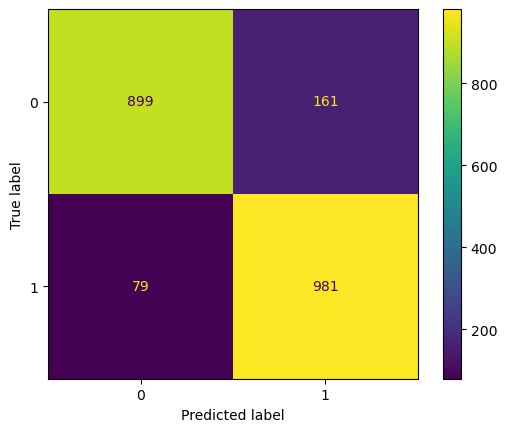

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

lgbm = LGBMClassifier(random_state=random_seed)
lgbm.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(lgbm.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(lgbm.score(X_test_transformed, y_test_transformed)))

pred = lgbm.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, lgbm.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()


In [30]:
acc_train1_LBGM = lgbm.score(X_train_transformed, y_train_transformed)
acc_test1_LBGM = lgbm.score(X_test_transformed, y_test_transformed)

#### Grid search for hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'num_leaves': [31, 63, 127],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000]
             }

In [33]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [31, 63, 127]})

In [34]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


In [35]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.29,0.22,0.00,0.00,0.1,100,31,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.88,0.89,0.88,0.90,0.89,0.89,0.01,1
15,1.60,0.08,0.03,0.00,0.01,1000,31,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",0.89,0.89,0.89,0.89,0.89,0.89,0.00,2
16,3.05,0.13,0.05,0.00,0.01,1000,63,"{'learning_rate': 0.01, 'n_estimators': 1000, ...",0.88,0.89,0.89,0.89,0.89,0.89,0.00,3


In [36]:
# grid_search.predict(x_test)

#### Cross validation

In [37]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# # Perform cross-validation after grid search
# scores = cross_val_score(grid_search, X_test_transformed, y_test_transformed, cv=10)
# print("Cross-validation scores: ", scores)
# print("Mean accuracy: ", scores.mean())

#### Re-run model

Accuracy of LBGM classifier on training set: 0.9483
Accuracy of LBGM classifier on test set: 0.8868
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1060
           1       0.86      0.93      0.89      1060

    accuracy                           0.89      2120
   macro avg       0.89      0.89      0.89      2120
weighted avg       0.89      0.89      0.89      2120



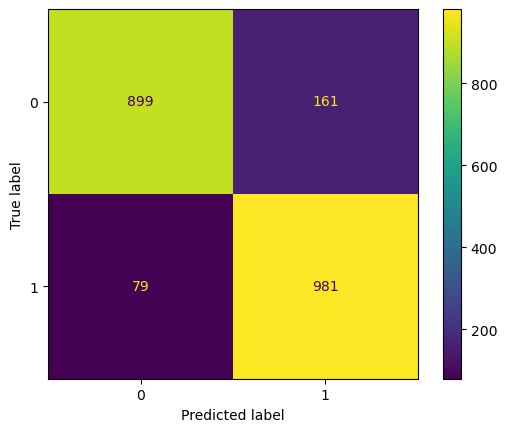

In [38]:
print('Accuracy of LBGM classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LBGM classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [39]:
acc_train2_LBGM = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_LBGM = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [40]:
importances = lgbm.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_LGBM = importance_df

    feature_name  importance
24     Curvature         441
23  Transparency         197
20     Concavity         174
35   Fiber Width         171
36    type_micro         164
33   Ellipticity         146
21     Convexity         137
13     L/T Ratio         129
3     FThickness         121
5     EThickness         100


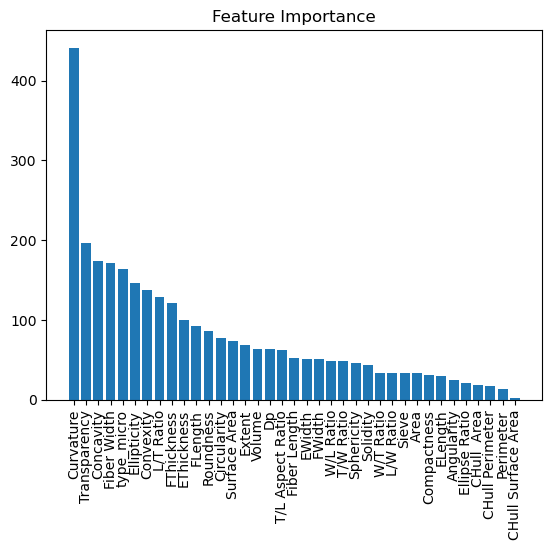

In [41]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### AdaBoost (Adaptive Boosting)

#### Train-test split

In [42]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [43]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [44]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.8642
Accuracy of LGBM classifier on test set: 0.8505
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1060
           1       0.82      0.90      0.86      1060

    accuracy                           0.85      2120
   macro avg       0.85      0.85      0.85      2120
weighted avg       0.85      0.85      0.85      2120



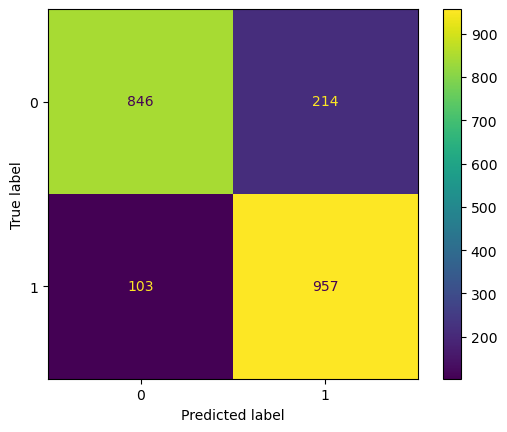

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

ada = AdaBoostClassifier(random_state=random_seed)
ada.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(ada.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(ada.score(X_test_transformed, y_test_transformed)))

pred = ada.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, ada.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

In [47]:
acc_train1_ada = ada.score(X_train_transformed, y_train_transformed)
acc_test1_ada = ada.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [50]:
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [51]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}


In [52]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.02,0.05,0.05,0.00,SAMME.R,1.0,150,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.85,0.87,0.86,0.89,0.86,0.87,0.01,1
14,2.04,0.01,0.05,0.00,SAMME.R,0.5,150,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,...",0.85,0.87,0.86,0.88,0.87,0.87,0.01,2
16,1.36,0.01,0.03,0.00,SAMME.R,1.0,100,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.85,0.86,0.86,0.88,0.86,0.86,0.01,3


In [53]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of AdaBoost classifier on training set: 0.8817
Accuracy of AdaBoost classifier on test set: 0.8627
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1060
           1       0.84      0.90      0.87      1060

    accuracy                           0.86      2120
   macro avg       0.86      0.86      0.86      2120
weighted avg       0.86      0.86      0.86      2120



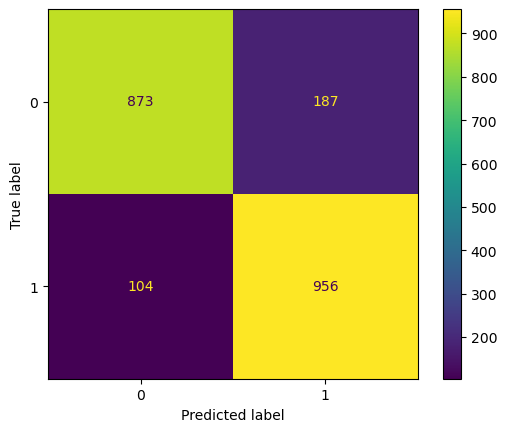

In [54]:
print('Accuracy of AdaBoost classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [55]:
acc_train2_ada = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_ada = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [56]:
importances = ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_ada = importance_df

    feature_name  importance
24     Curvature        0.36
23  Transparency        0.08
20     Concavity        0.08
35   Fiber Width        0.06
7         Volume        0.04
25  Surface Area        0.04
33   Ellipticity        0.04
36    type_micro        0.04
5     EThickness        0.04
34  Fiber Length        0.02


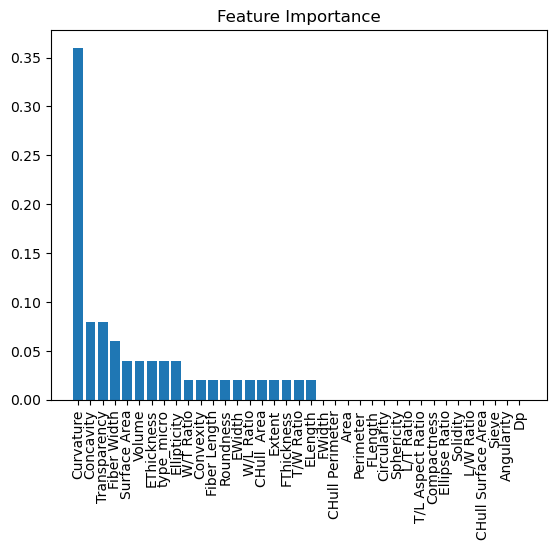

In [57]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Random forest

#### Train-test split

In [58]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 10

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

# X_holdout = X_test
# y_holdout = y_test

In [59]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [60]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of RF classifier on training set: 0.9881
Accuracy of RF classifier on test set: 0.8759
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1060
           1       0.86      0.90      0.88      1060

    accuracy                           0.88      2120
   macro avg       0.88      0.88      0.88      2120
weighted avg       0.88      0.88      0.88      2120



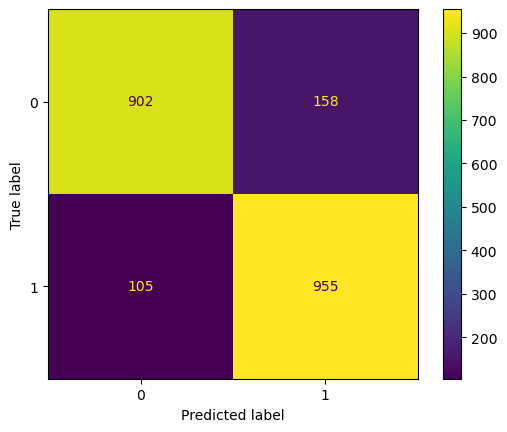

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed =10

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.4f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [63]:
acc_train1_rf = rf.score(X_train_transformed, y_train_transformed)
acc_test1_rf = rf.score(X_test_transformed, y_test_transformed)

#### Grid Search for hyperparameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_leaf_nodes': [10, 20, 30],
#               'class_weight':[None, 'balanced'],
#               'criterion': ['gini', 'entropy']}

In [66]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [67]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [68]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.38,0.01,0.01,0.00,None,5,100,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.85,0.86,0.90,0.86,0.84,0.86,0.02,1
4,0.19,0.00,0.01,0.00,None,5,50,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.85,0.86,0.89,0.85,0.86,0.86,0.01,2
22,0.18,0.00,0.01,0.00,10,5,50,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.85,0.84,0.89,0.86,0.85,0.86,0.02,2


#### Cross validation

In [69]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# # Perform cross-validation after grid search
# scores = cross_val_score(grid_search, X_test_transformed, y_test_transformed, cv=10)
# print("Cross-validation scores: ", scores)
# print("Mean accuracy: ", scores.mean())

#### Re-run model

Accuracy of Random Forest classifier on training set: 0.8653
Accuracy of Random Forest classifier on test set: 0.9830
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1060
           1       0.97      0.99      0.98      1060

    accuracy                           0.98      2120
   macro avg       0.98      0.98      0.98      2120
weighted avg       0.98      0.98      0.98      2120



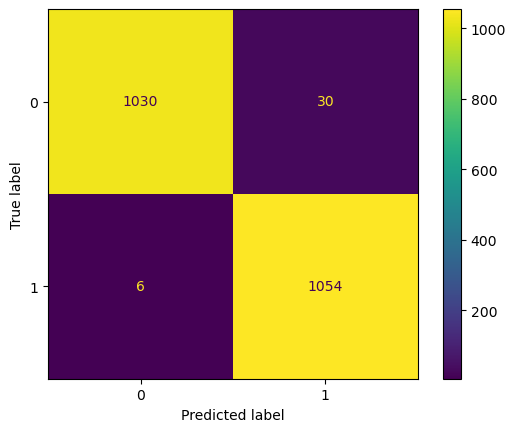

In [70]:
print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [71]:
acc_train2_rf = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_rf = grid_search.score(X_test_transformed, y_test_transformed)

#### Plot trees

In [72]:
# !pip install pydot

In [73]:
# import os
# from sklearn.tree import export_graphviz
# import six
# import pydot
# from sklearn import tree
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in rf.estimators_:
#     export_graphviz(tree_in_forest,out_file='tree.dot',
#     feature_names=micro.columns[:-1],
#     filled=True,
#     rounded=True)
#     (graph,) = pydot.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1

In [74]:
# clf = RandomForestClassifier(**best_params_, random_state=random_seed)
# clf.fit(X_train_transformed, y_train_transformed)
# # Plot the first tree of the forest
# plt.figure(figsize=(20,15))
# tree = clf.estimators_[0]
# plot_tree(tree, filled=True, rounded=True, class_names=['Soil', 'Lithic'])
# plt.show()

In [75]:
# rf = RandomForestClassifier('max_depth'=None,
#                             'n_estimators': 100,
#                             'min_samples_split': 5, 
#                             random_state=10)
# rf.estimators_[index]

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(15, 10))
# plot_tree(rf.estimators_[0], 
#           feature_names=micro.feature_names,
#           class_names=micro.target_names, 
#           filled=True, impurity=True, 
#           rounded=True)

#### Feature importance

In [76]:
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_rf = importance_df

     feature_name  importance
24      Curvature        0.37
35    Fiber Width        0.04
36     type_micro        0.04
16      Roundness        0.03
17  Ellipse Ratio        0.03
23   Transparency        0.03
34   Fiber Length        0.03
3      FThickness        0.02
19       Solidity        0.02
20      Concavity        0.02


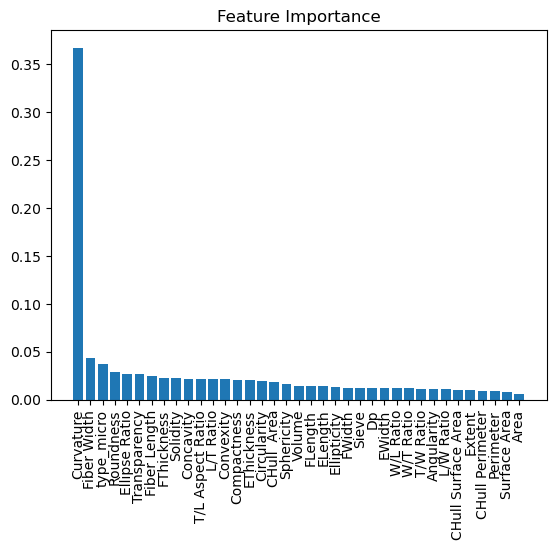

In [77]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Bagging (Bootstrapped Aggregation)

#### Train-test split

In [78]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [79]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [80]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.8573
Accuracy of LGBM classifier on test set: 0.8462
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1060
           1       0.81      0.91      0.86      1060

    accuracy                           0.85      2120
   macro avg       0.85      0.85      0.85      2120
weighted avg       0.85      0.85      0.85      2120



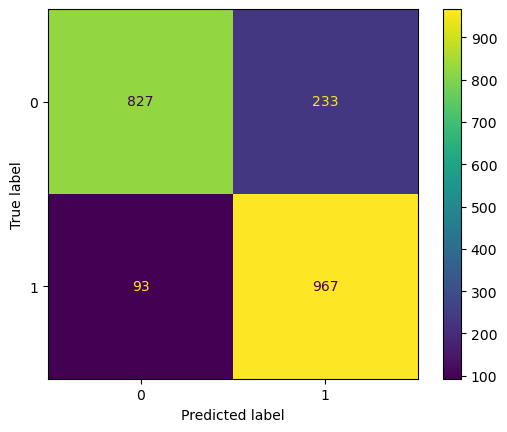

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=random_seed)
bagging.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(bagging.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(bagging.score(X_test_transformed, y_test_transformed)))

pred = bagging.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, bagging.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()

In [83]:
acc_train1_bagging = bagging.score(X_train_transformed, y_train_transformed)
acc_test1_bagging = bagging.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 1.0, 2.0],
              'max_features': [0.5, 1.0, 2.0]}

In [86]:
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150]})

In [87]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 150}


In [88]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,3.08,0.05,0.05,0.00,1.0,0.5,150,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.84,0.86,0.84,0.87,0.85,0.85,0.01,1
10,2.03,0.01,0.03,0.00,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.84,0.86,0.84,0.86,0.85,0.85,0.01,2
9,1.03,0.02,0.02,0.00,1.0,0.5,50,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.85,0.86,0.84,0.86,0.85,0.85,0.01,3


In [89]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of Bagging classifier on training set: 0.8573
Accuracy of Bagging classifie on test set: 0.8420
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1060
           1       0.80      0.91      0.85      1060

    accuracy                           0.84      2120
   macro avg       0.85      0.84      0.84      2120
weighted avg       0.85      0.84      0.84      2120



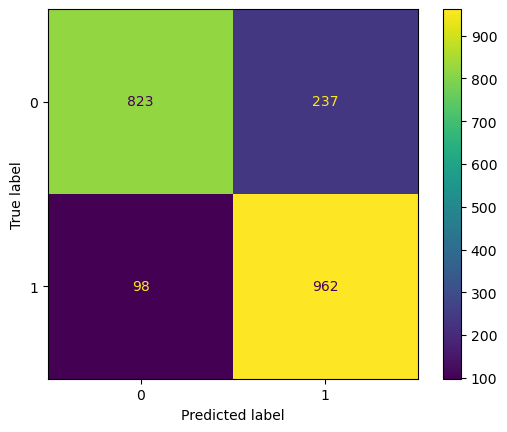

In [90]:
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Bagging classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [91]:
acc_train2_bagging = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_bagging = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [92]:
# importances = bagging.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_bagging = importance_df

In [93]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

### Extra trees

#### Train-test split

In [94]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [95]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [96]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [97]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of Extra Trees classifier on training set: 0.9886
Accuracy of Extra Trees classifier on test set: 0.8745
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1060
           1       0.85      0.90      0.88      1060

    accuracy                           0.87      2120
   macro avg       0.88      0.87      0.87      2120
weighted avg       0.88      0.87      0.87      2120



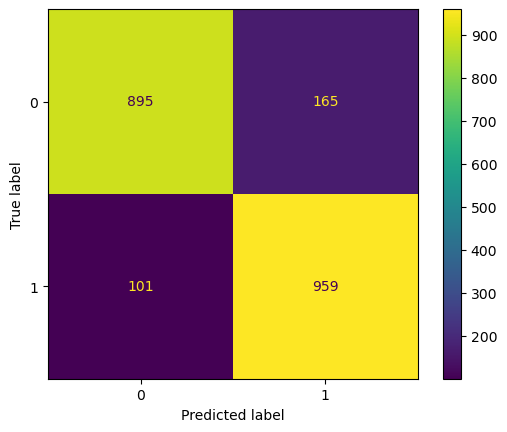

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

etree = ExtraTreesClassifier(random_state=random_seed)
etree.fit(X_train_transformed, y_train_transformed)
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(etree.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(etree.score(X_test_transformed, y_test_transformed)))

pred = etree.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, etree.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etree.classes_)
disp.plot()

plt.show()

In [99]:
acc_train1_etree = etree.score(X_train_transformed, y_train_transformed)
acc_test1_etree = etree.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'n_estimators': [10, 50, 100, 150],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

In [102]:
grid_search = GridSearchCV(etree, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150]})

In [103]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [104]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.20,0.04,0.02,0.00,20,5,100,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.82,0.86,0.88,0.89,0.82,0.85,0.03,1
43,0.28,0.01,0.02,0.00,20,5,150,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.81,0.85,0.88,0.89,0.83,0.85,0.03,2
10,0.18,0.00,0.02,0.00,None,10,100,"{'max_depth': None, 'min_samples_split': 10, '...",0.82,0.85,0.87,0.88,0.83,0.85,0.02,3


#### Re-run model

Accuracy of Extra Trees classifier on training set: 0.8576
Accuracy of Extra Trees classifier on test set: 0.9797
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1060
           1       0.97      0.99      0.98      1060

    accuracy                           0.98      2120
   macro avg       0.98      0.98      0.98      2120
weighted avg       0.98      0.98      0.98      2120



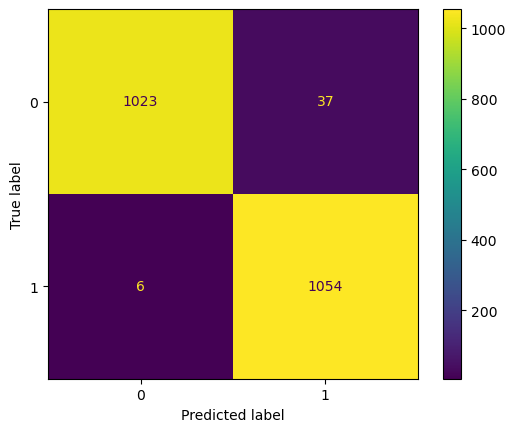

In [105]:
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [106]:
acc_train2_etree = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_etree = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [107]:
importances = etree.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_etree = importance_df

     feature_name  importance
24      Curvature        0.29
35    Fiber Width        0.05
36     type_micro        0.04
33    Ellipticity        0.03
17  Ellipse Ratio        0.03
16      Roundness        0.03
18    Circularity        0.03
15    Compactness        0.03
23   Transparency        0.03
19       Solidity        0.02


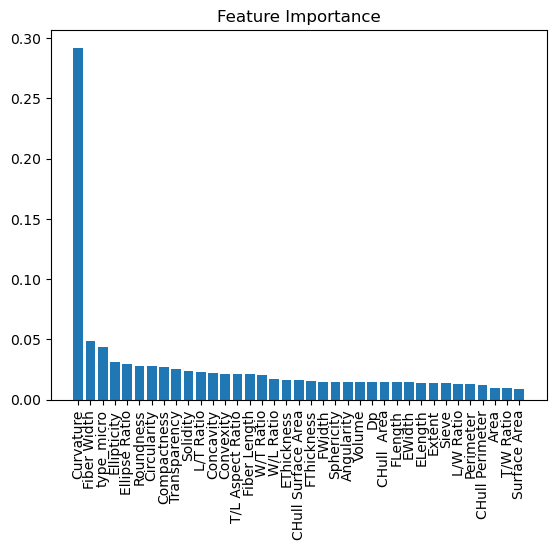

In [108]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### SVC (Support Vector Classification)

#### Train-test split

In [109]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [110]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [111]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [112]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LR classifier on training set: 0.8806
Accuracy of LR classifier on test set: 0.8708
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1060
           1       0.83      0.93      0.88      1060

    accuracy                           0.87      2120
   macro avg       0.88      0.87      0.87      2120
weighted avg       0.88      0.87      0.87      2120



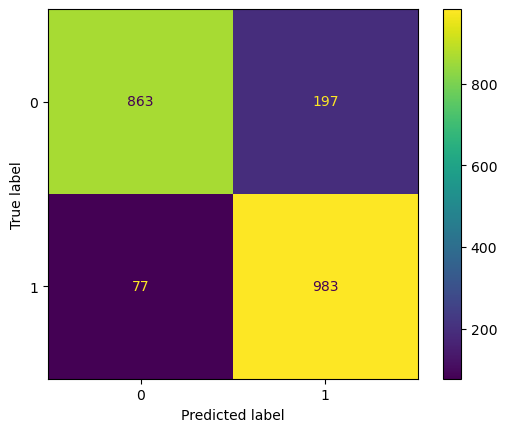

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

svc = SVC(random_state=random_seed)
svc.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LR classifier on training set: {:.4f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(svc.score(X_test_transformed, y_test_transformed)))

pred = svc.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()

In [114]:
acc_train1_svc = svc.score(X_train_transformed, y_train_transformed)
acc_test1_svc = svc.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.01, 0.1, 1]}

In [117]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [118]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [119]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.07,0.00,0.05,0.00,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.84,0.88,0.88,0.88,0.85,0.87,0.02,1
22,0.08,0.00,0.05,0.01,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.83,0.87,0.87,0.88,0.86,0.86,0.02,2
13,0.08,0.00,0.06,0.00,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.82,0.87,0.87,0.86,0.86,0.86,0.02,3


In [120]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of SV classifier on training set: 0.8715
Accuracy of SV classifie on test set: 0.8783
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1060
           1       0.84      0.93      0.88      1060

    accuracy                           0.88      2120
   macro avg       0.88      0.88      0.88      2120
weighted avg       0.88      0.88      0.88      2120



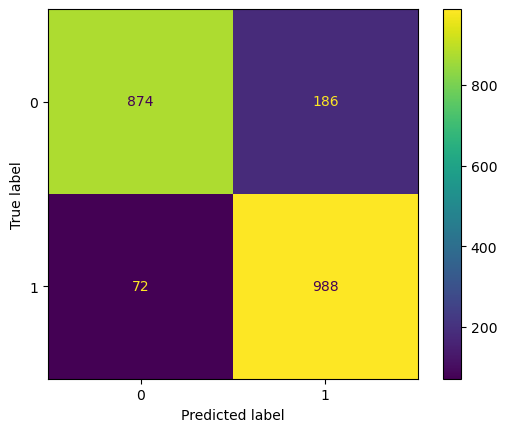

In [121]:
print('Accuracy of SV classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SV classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [122]:
acc_train2_svc = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_svc = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [123]:
# importances = svc.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_svc = importance_df

In [124]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [125]:
### XGBoost

In [126]:
### Gradient Boosting

## Visualizations

### Model accuracies

In [127]:
df = {'model': ['LightGBM', 'AdaBoost', 'Random Forest', 'Bagging', 'Extra Trees', 'SVC'], 
            'train_accuracy': [acc_train1_LBGM, acc_train1_ada, acc_train1_rf, acc_train1_bagging, acc_train1_etree, acc_train1_svc], 
            'test_accuracy': [acc_test1_LBGM, acc_test1_ada, acc_test1_rf, acc_test1_bagging, acc_test1_etree, acc_test1_svc],
            'train_accuracy_CV': [acc_train2_LBGM, acc_train2_ada, acc_train2_rf, acc_train2_bagging, acc_train2_etree, acc_train2_svc], 
            'test_accuracy_CV': [acc_test2_LBGM, acc_test2_ada, acc_test2_rf, acc_test2_bagging, acc_test1_etree, acc_test2_svc]}

accuracy = pd.DataFrame(df)


In [128]:
df = pd.DataFrame(df)
df

,model,train_accuracy,test_accuracy,train_accuracy_CV,test_accuracy_CV
0,LightGBM,0.95,0.89,0.95,0.89
1,AdaBoost,0.86,0.85,0.88,0.86
2,Random Forest,0.99,0.88,0.87,0.98
3,Bagging,0.86,0.85,0.86,0.84
4,Extra Trees,0.99,0.87,0.86,0.87
5,SVC,0.88,0.87,0.87,0.88


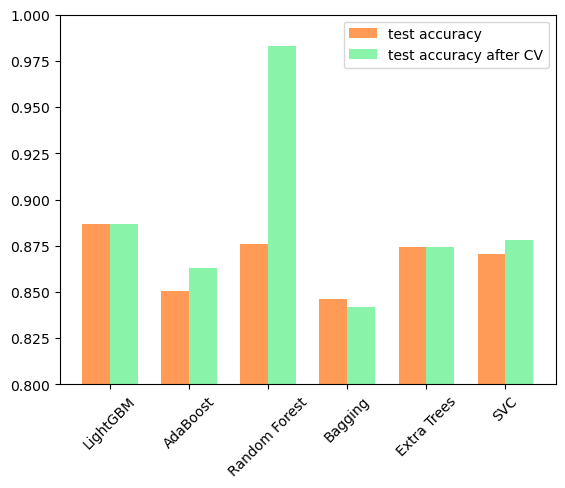

In [129]:
bar_width = 0.35

models = np.arange(len(df['model']))

plt.bar(models - bar_width/2, df['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, df['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

# for i, v in enumerate(df['test_accuracy']):
#     plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

# for i, v in enumerate(df['test_accuracy_CV']):
#     plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

plt.xticks(models, df['model'])
plt.xticks(rotation = 45)
plt.ylim(0.8, 1)
plt.legend()
plt.show()

In [148]:
df.to_csv("accuracy_archaeologicalSoil_under.csv")

In [131]:
# acc_train1_LBGM
# acc_test1_LBGM

# acc_train1_ada
# acc_test1_ada

# acc_train1_rf
# acc_test1_rf

# acc_train1_bagging
# acc_test1_bagging

# acc_train1_svc 
# acc_test1_svc

# acc_train2_LBGM
# acc_test2_LBGM

# acc_train2_ada 
# acc_test2_ada 

# acc_train2_rf
# acc_test2_rf

# acc_train2_bagging 
# acc_test2_bagging

# acc_train2_svc
# acc_test2_svc

### Overall feature importance

In [132]:
fi_LGBM['importance'] = fi_LGBM['importance'] / fi_LGBM['importance'].sum()

In [133]:
fi_LGBM['rank'] = range(1, fi_LGBM.shape[0]+1)

In [134]:
fi_LGBM.head(5)

,feature_name,importance,rank
24,Curvature,0.15,1
23,Transparency,0.07,2
20,Concavity,0.06,3
35,Fiber Width,0.06,4
36,type_micro,0.05,5


In [135]:
fi_LGBM = fi_LGBM[['feature_name','importance']]
fi_LGBM = fi_LGBM.reset_index(drop=True)

In [136]:
fi_ada['rank'] = range(1, fi_ada.shape[0]+1)

In [137]:
fi_ada.head(5)

,feature_name,importance,rank
24,Curvature,0.36,1
23,Transparency,0.08,2
20,Concavity,0.08,3
35,Fiber Width,0.06,4
7,Volume,0.04,5


In [138]:
fi_ada = fi_ada[['feature_name','importance']]
fi_ada = fi_ada.reset_index(drop=True)

In [139]:
fi_rf['rank'] = range(1, fi_rf.shape[0]+1)

In [140]:
fi_rf.head()

,feature_name,importance,rank
24,Curvature,0.37,1
35,Fiber Width,0.04,2
36,type_micro,0.04,3
16,Roundness,0.03,4
17,Ellipse Ratio,0.03,5


In [141]:
fi_rf = fi_rf[['feature_name','importance']]
fi_rf = fi_rf.reset_index(drop=True)

In [142]:
fi_etree['rank'] = range(1, fi_etree.shape[0]+1)

In [143]:
fi_etree = fi_etree[['feature_name','importance']]
fi_etree = fi_etree.reset_index(drop=True)

In [144]:
fi = pd.concat([fi_LGBM, fi_ada, fi_rf, fi_etree])

In [145]:
mean_rank = fi.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [146]:
mean_rank.head(10)

,importance
feature_name,
Curvature,0.29
Fiber Width,0.05
Transparency,0.05
Concavity,0.05
type_micro,0.04
Ellipticity,0.03
EThickness,0.03
Convexity,0.03
Roundness,0.03


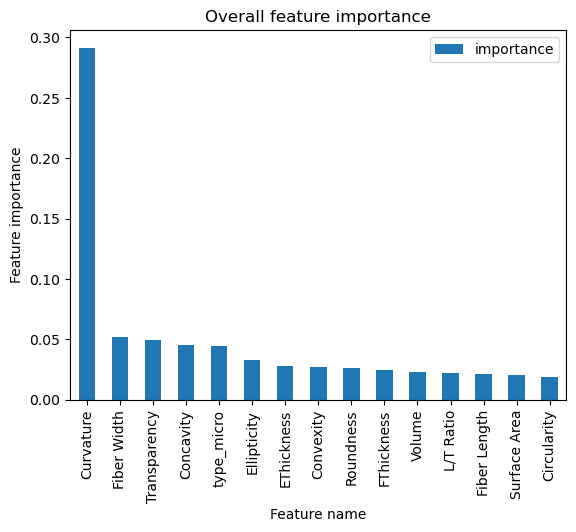

In [147]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(15).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()

In [149]:
mean_rank[['feature_name','importance']].to_csv("fi_ArchaeologicalSoil_under.csv")